# Problem statement for employee attrition:

## A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



## Fields in the dataset
- satisfaction_level: Employee satisfaction level
- last_evaluation: last evaluation date
- number_of_projects: Number of projects for each employee
- average_monthly_hours: monthly working hours of employee
- years_at_company: year at company
- work accident: any accident on work
- left: left or stayed
- promotion_last_5years: received promotion or not
- department: department of employee
- salary: salary of an employee


## Understanding problem statement
- 1. When an employee leaves the company the organization should replace them with other person. In that time organization faces some problems like person will be replaced with more package, time spend on the training, and productivity
- 2. To overcome this problem organization needs to predict why employees are leaving and reasons for same. So that organization can retain them within time period.
- 3. By building the model the organization can able to know for the above problem's solutions
- 4. Based on given fields by the organization we need to predict the frequency of employee turnover

### Critical thinking approach
- As the employee turnover plays an vital role in an organization. Here are fews ways that helps the organization to retain the employees
- By increasing the friendly conversations between employees and managers help them to discuss their problems
- The projects should be given mostly in same proportion
- The working hours should be balanced
- Organization should also focus on work accidents like social issues. If not they may lose good employees

## Step1: data import and preprocessing

In [1]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#sns.set(style='darkgrid')

from sklearn.model_selection import train_test_split # for splitting the data
#from sklearn.linear_model import LinearRegression  #for linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics


In [2]:
# import data
Emp_data=pd.read_csv('Employee_Attrition.csv')

In [3]:
# display the import data
Emp_data

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_of_projects       14999 non-null int64
average_monthly_hours    14999 non-null int64
years_at_company         14999 non-null int64
work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
Emp_data.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Understanding the given attributes

In [6]:
# check the missing values
Emp_data.isnull().any() #data is clean as there are no missing values

satisfaction_level       False
last_evaluation          False
number_of_projects       False
average_monthly_hours    False
years_at_company         False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [7]:
# dimensions of the dataset
Emp_data.shape

(14999, 10)

In [8]:
Emp_data.describe().T # max is 310 hours so one person is working for 15 hours per weekday

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_of_projects,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
years_at_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The department column of the dataset has many categories and we need to reduce the categories for a better modeling. The department column has the following categories:

In [9]:
Emp_data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### we can combine “technical”, “support” and “IT” these three together can be named as “technical”.

In [10]:
#Combine "technical","support" and "IT" into one department
Emp_data['department']=np.where(Emp_data['department'] =='support', 'technical', Emp_data['department'])
Emp_data['department']=np.where(Emp_data['department'] =='IT', 'technical', Emp_data['department'])


In [11]:
Emp_data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
Emp_data.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking the outliers of the dataset

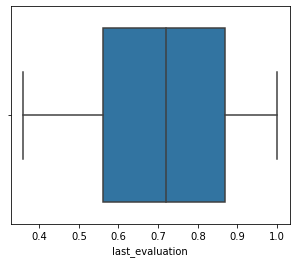

In [13]:
plt.figure(figsize=(5,4))
sns.boxplot(Emp_data['last_evaluation'])
plt.show();

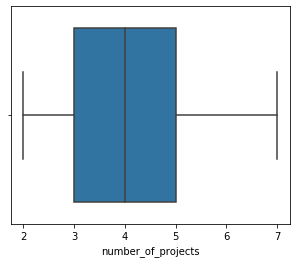

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(Emp_data['number_of_projects'])
plt.show();

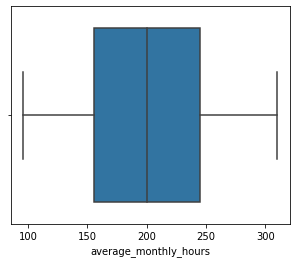

In [15]:
plt.figure(figsize=(5,4))
sns.boxplot(Emp_data['average_monthly_hours'])
plt.show();

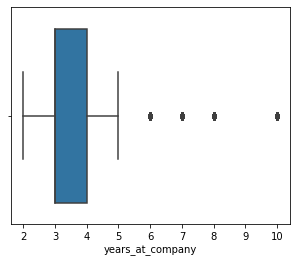

In [16]:
plt.figure(figsize=(5,4))
sns.boxplot(Emp_data['years_at_company'])
plt.show();

### It shows some outliers because some employees are working in the organization more than 6 years

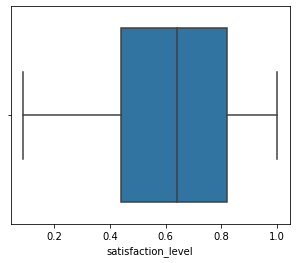

In [17]:
plt.figure(figsize=(5,4))
sns.boxplot(Emp_data['satisfaction_level'])
plt.show();

### Checking the distribution of the data

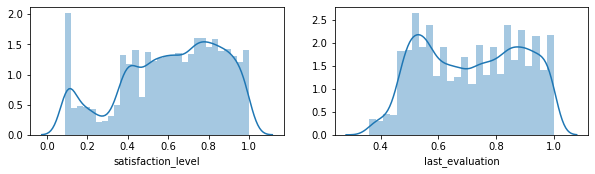

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,3)
sns.distplot(Emp_data['satisfaction_level'])


plt.subplot(3,2,4)
sns.distplot(Emp_data['last_evaluation'])
plt.show();


#### From the plots,i found that in the column satisfaction_level,the distribution of the values are not even(ranges from 0 to 1) and there are few employees whose satisfaction_level is 0 and also employees whose satisfaction level is equal to 1 

#### From the plots,i found that in the column last_evaluation,the distribution of the values are not even(ranges from 0 to 1) and there are few employees whose satisfaction_level is 0 and also employees whose last_evaluation score is equal to 1

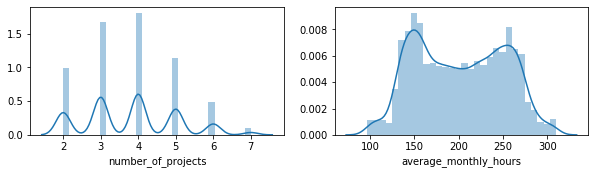

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,3)
sns.distplot(Emp_data['number_of_projects'])


plt.subplot(3,2,4)
sns.distplot(Emp_data['average_monthly_hours'])
plt.show();


#### From the above graph, we can observe that employees are assigned with 2 projects are more and there are few employees whose number of projects are 7

#### From the above graph, we can observe that most of the employees work more than 100 hours per month and there are few employees more than 300 hours per month

## Correlation analysis

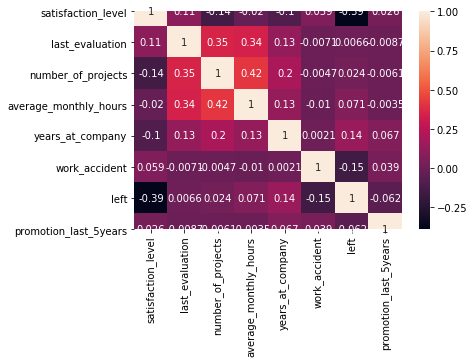

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(Emp_data.corr(),annot=True)
plt.show();

### There exists correlation between number of projects and average monthly working hours,which we can say that,when the number of projects increases the number of working hours of some employees increases and vice versa

## Define null hypothesis

- As per the chisquare test, we define null hypothesis: assumes that there is no association between the two variables. Alternative hypothesis: Assumes that there is an association between the two variables (dependency between two variables). If the observed chi-square test statistic is greater than the critical value, the null hypothesis can be rejected



In [21]:
emp=pd.crosstab(index=Emp_data['left'], columns=Emp_data['department'])
emp1=pd.crosstab(index=Emp_data['left'], columns=Emp_data['salary'])

In [22]:
## Implementing chi-square test

from scipy.stats import chi2_contingency
chi2_contingency(emp)

(81.43184416188934,
 7.029905559090635e-15,
 7,
 array([[ 599.62904194,  584.39069271,  563.0570038 ,  480.00800053,
          653.72518168,  687.24954997, 3154.33828922, 4705.60224015],
        [ 187.37095806,  182.60930729,  175.9429962 ,  149.99199947,
          204.27481832,  214.75045003,  985.66171078, 1470.39775985]]))

In [23]:
chi2_contingency(emp1)

(381.2250470662106,
 1.652086749296005e-83,
 2,
 array([[ 942.49189946, 5574.18814588, 4911.31995466],
        [ 294.50810054, 1741.81185412, 1534.68004534]]))

### We can observe that in both department and salary against left columns, P < 0.5 that means null hypothesis rejected. There is dependency between two variables.

## Observations from the dataset

In [24]:
# we should check how many employees left the company
Emp_data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

- We observe that 3571 employees left the company, which is 23.8 per cent of the total employees in the organisation.

In [25]:
Emp_data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Observations from the above table:
- The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
- The average monthly work hours of employees who left the company is more than that of the employees who stayed.
- The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
- The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

In [26]:
# calculate the mean of department and salary
Emp_data.groupby('department').mean()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [27]:
Emp_data.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


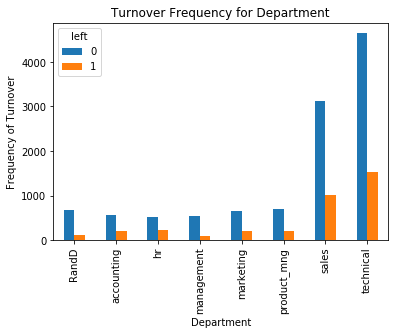

In [28]:
%matplotlib inline
#Bar chart for department employee work for and the frequency of turnover

cross_tab=pd.crosstab(Emp_data.department,Emp_data.left) 
cross_tab.plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

- In the above table, we can observe that frequency of employee turnover mostly depends on the department which they work for. Therefore, department can be a good predictor for outcome variable

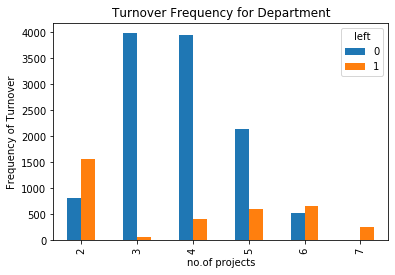

In [29]:
cross_tab=pd.crosstab(Emp_data.number_of_projects,Emp_data.left) 
cross_tab.plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('no.of projects')
plt.ylabel('Frequency of Turnover')
plt.show()


- In the above table we can observe that people who have less and more projects are leaving compare to others

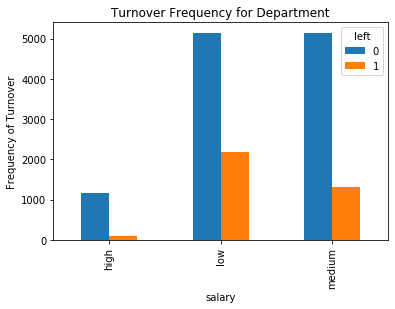

In [30]:
# Also visualize with barchart for employee salary level and the frequency of turnover
cross_tab=pd.crosstab(Emp_data.salary,Emp_data.left) 
cross_tab.plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('salary')
plt.ylabel('Frequency of Turnover')
plt.show()


- This observation also helps us in decision making as salary depends on the frequency of turnover. So, this also can be good predictor for outcome variable

In [31]:
df=Emp_data[Emp_data['left']==1]
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
data=df.groupby('department')['satisfaction_level'].sum()
data=data.reset_index()
data

,department,satisfaction_level
0,RandD,52.37
1,accounting,82.13
2,hr,93.18
3,management,38.48
4,marketing,91.99
5,product_mng,95.35
6,sales,453.93
7,technical,664.16


In [33]:
data=data.sort_values(by='satisfaction_level',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

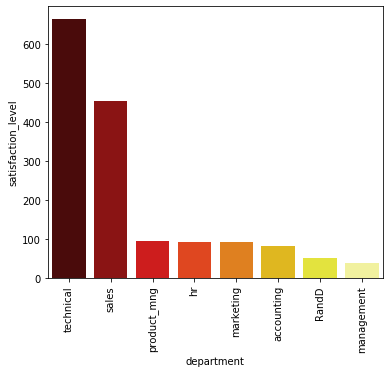

In [34]:

plt.figure(figsize=(6,5))
sns.barplot(x='department',y='satisfaction_level',data=data,palette='hot')
plt.xticks(rotation=90)

### From the above graph i observed that ,the employees who are leaving the organization has better satisfaction level in both the departments (technical and sales),so satisfaction level may not be the exact reason

In [35]:
data=df.groupby('department')['last_evaluation'].sum()
data=data.reset_index()
data

,department,last_evaluation
0,RandD,90.19
1,accounting,141.68
2,hr,146.14
3,management,66.18
4,marketing,140.48
5,product_mng,143.86
6,sales,721.20
7,technical,1114.65


In [36]:
data=data.sort_values(by='last_evaluation',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

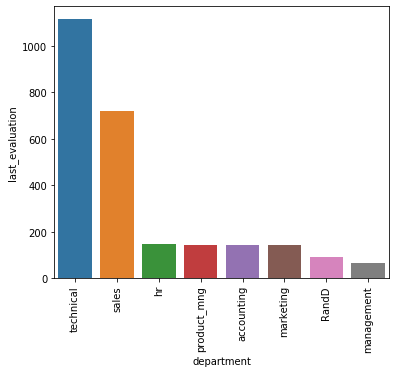

In [37]:
plt.figure(figsize=(6,5))
sns.barplot(x='department',y='last_evaluation',data=data)
plt.xticks(rotation=90)

### From the above results i found that employees from departments(sales and technical) are leaving the organization even they have better last_evaluation scores

In [38]:
data=df.groupby('department')['average_monthly_hours'].sum()
data=data.reset_index()
data

,department,average_monthly_hours
0,RandD,25528
1,accounting,42234
2,hr,42421
3,management,18861
4,marketing,40801
5,product_mng,41142
6,sales,207912
7,technical,321795


In [39]:
data=data.sort_values(by='average_monthly_hours',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

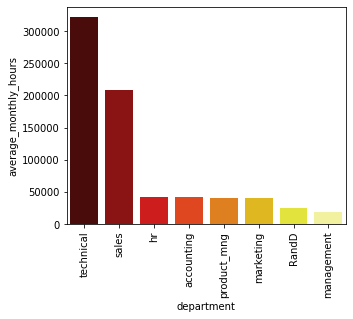

In [40]:
plt.figure(figsize=(5,4))
sns.barplot(x='department',y='average_monthly_hours',data=data,palette='hot')
plt.xticks(rotation=90)

### The results that  are interpreted from the above graph were the employees who are leaving the organization from departments (sales and technical) are likely to have more working hours,compared to other departments

In [41]:
data=df.groupby('department')['number_of_projects'].count()
data=data.reset_index()
data

,department,number_of_projects
0,RandD,121
1,accounting,204
2,hr,215
3,management,91
4,marketing,203
5,product_mng,198
6,sales,1014
7,technical,1525


In [42]:
data=data.sort_values(by='number_of_projects',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

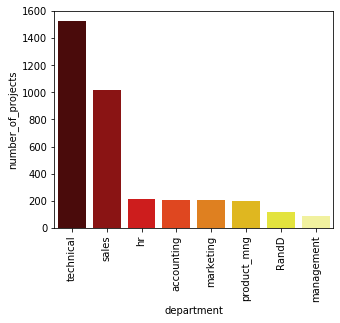

In [43]:
plt.figure(figsize=(5,4))
sns.barplot(x='department',y='number_of_projects',data=data,palette='hot')
plt.xticks(rotation=90)

### In these departments (sales and technical), assigned more no. of projects compared to others. This may be the reason for the employees to leave the organization. 

In [44]:
fre=pd.crosstab(index=Emp_data['salary'],columns=Emp_data['department'])
fre

department,RandD,accounting,hr,management,marketing,product_mng,sales,technical
salary,,,,,,,,
high,51,74,45,225,80,68,269,425
low,364,358,335,180,402,451,2099,3127
medium,372,335,359,225,376,383,1772,2624


### The employees in the departments (sales and technical) are likely to have low and medium salaries in high number compared to other departments,so this may be the one of the reason,why employees are leaving the organization from those two departments

In [45]:
m=pd.crosstab(index=df['promotion_last_5years'],columns=df['department'])
m

department,RandD,accounting,hr,management,marketing,product_mng,sales,technical
promotion_last_5years,,,,,,,,
0,121,204,215,88,203,198,1007,1516
1,0,0,0,3,0,0,7,9


### The employees working in the departments(sales and technical) are getting lesser promotions,compared to other departments,so this may be the one of the reason,why employees are leaving the organization 

In [46]:
#Proportion of employees left by department
pd.crosstab(Emp_data.last_evaluation, Emp_data.left)

left,0,1
last_evaluation,,
0.36,22,0
0.37,55,0
0.38,50,0
0.39,52,0
0.40,57,0
...,...,...
0.96,182,67
0.97,192,84
0.98,199,64


In [47]:
#Proportion of employees left by department
pd.crosstab(Emp_data.department, Emp_data.left)

left,0,1
department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


- We can conclude from the above observations sales department people are leaving more with low and medium salaries compare to others

#### To build a machine learning every column should be in numerical format for that we are converting categorical into numerical using label encoding and get dummies

In [48]:
## Convert the categorical into numerical values for further prediction

In [49]:
# Get the categorical columns in the dataset to build the model for the prediction
Categorical=Emp_data.select_dtypes('object')
Categorical

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,technical,low
14995,technical,low
14996,technical,low
14997,technical,low


In [50]:
# Convert the categorical into numerical values using label encoding for salary as it is a ordinary data
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
Emp_data['salary']=label_encoder.fit_transform(Emp_data['salary'])

In [51]:
Emp_data

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,1
14995,0.37,0.48,2,160,3,0,1,0,technical,1
14996,0.37,0.53,2,143,3,0,1,0,technical,1
14997,0.11,0.96,6,280,4,0,1,0,technical,1


In [52]:
# Create a set of dummy variables from the department variable for nominal data 
Department=pd.get_dummies(Emp_data['department'],prefix='department',drop_first=True)
Emp_data=pd.concat([Emp_data,Department],axis=1)

In [53]:
Emp_data

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,1,0,0,0,0,0,0,1
14995,0.37,0.48,2,160,3,0,1,0,technical,1,0,0,0,0,0,0,1
14996,0.37,0.53,2,143,3,0,1,0,technical,1,0,0,0,0,0,0,1
14997,0.11,0.96,6,280,4,0,1,0,technical,1,0,0,0,0,0,0,1


In [54]:
Emp_data.drop(Emp_data.columns[[8]], axis=1, inplace=True)
          ## dropping unneccessary columns after encoding

In [55]:
Emp_data

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,salary,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,1
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,1
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,1
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,1


In [56]:
Emp_data.shape

(14999, 16)

## Build a Machine learning model for the data

- In this dataset most of the predictions are depending categorical variables. Therefore we are using classification algorithms
- We apply different algorithms and check the accuracy score for the better model

In [57]:
# cross validation for splitting and training data
cols=['satisfaction_level','last_evaluation','number_of_projects','average_monthly_hours','years_at_company','work_accident', 'promotion_last_5years','salary','department_hr','department_management','department_marketing','department_product_mng','department_sales','department_technical']
X=Emp_data[cols]
Y=Emp_data['left']
      

In [58]:
#Split data into training and test samples

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [59]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_predict=knn.predict(X_test)


In [60]:
# check whether how many predictions are correct 
ls=[Y_test!=Y_predict]
print(len(ls))

1


## What is the best value of k?
- how to choose the optimal value of k
- plot a graph of all the possible values of k with respect the number of miss classifications of each value of k


In [61]:
k_list=[i for i in range(1,30)]

In [62]:
mis_class=[]

for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    prediction=knn.predict(X_test)
    cm=confusion_matrix(Y_test,Y_predict)
    
    mis_class.append(np.mean(prediction !=Y_test))

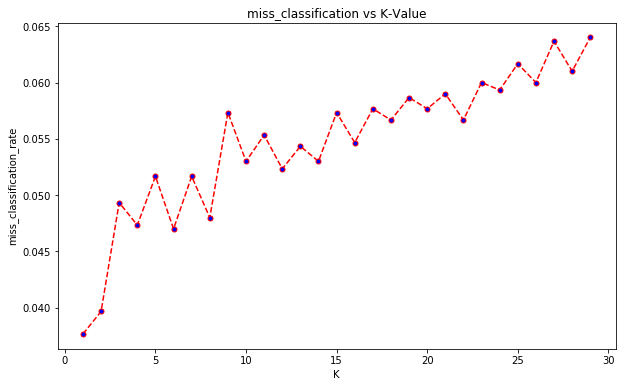

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), mis_class,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=5)
plt.title('miss_classification vs K-Value')
plt.xlabel('K')
plt.ylabel('miss_classification_rate')
plt.show();

In [64]:
print('knn score', knn.score(X_test,Y_test)*100 )

knn score 93.60000000000001


In [65]:
# precision and recall
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(Y_test,Y_predict))



              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2299
           1       0.87      0.93      0.90       701

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [66]:
# accuracy score
print('accuracy', metrics.accuracy_score(Y_test,Y_predict))

accuracy 0.9506666666666667


In this KNN model, we observed the accuray score is 95 percent 

In [67]:
# Now we apply logistic regression (no need to split the data again as we did it before)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

E:\Anconda02\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(Y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.763


- From this we can conclude that logistic regression accuracy score is less than KNN algorithm

In [69]:
print(classification_report(Y_test,logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2299
           1       0.49      0.25      0.33       701

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.73      0.76      0.73      3000



In [70]:
#Last algorithm naive_bayes method
# try different naive_bayes methods
Gb=GaussianNB()
Be=BernoulliNB()
Ml=MultinomialNB()


In [71]:
# Gaussian Model
from sklearn import metrics
Gb.fit(X_train,Y_train)


#making predictions on testing data
Y_pred=Gb.predict(X_test)
print('accuracy', metrics.accuracy_score(Y_test,Y_pred)*100)

accuracy 78.3


In [72]:
print(classification_report(Y_test,Gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2299
           1       0.52      0.78      0.63       701

    accuracy                           0.78      3000
   macro avg       0.72      0.78      0.74      3000
weighted avg       0.83      0.78      0.80      3000



In [73]:
#Bernoulli model
Be.fit(X_train,Y_train)


#making predictions on testing data
Y_pred=Be.predict(X_test)
print('accuracy', metrics.accuracy_score(Y_test,Y_pred)*100)

accuracy 76.63333333333333


In [74]:
print(classification_report(Y_test,Be.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2299
           1       0.00      0.00      0.00       701

    accuracy                           0.77      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.59      0.77      0.66      3000



E:\Anconda02\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
#MultinomnialNB model
Ml.fit(X_train,Y_train)


#making predictions on testing data
Y_pred=Ml.predict(X_test)
print('accuracy', metrics.accuracy_score(Y_test,Y_pred)*100)

accuracy 76.63333333333333


In [76]:
print(classification_report(Y_test,Ml.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2299
           1       0.00      0.00      0.00       701

    accuracy                           0.77      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.59      0.77      0.66      3000



E:\Anconda02\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### When an employee left, how often does the classifier predict that correctly? This measurement is called "recall" and When a classifier predicts an employee will leave, how often does that employee actually leave? This measurement is called "precision". 

## ROC curve


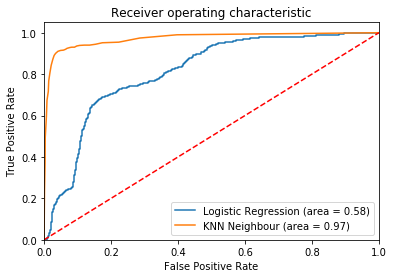

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#ROC for logistic regression
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
#ROC for KNN 
probs=knn.predict_proba(X_test)
prob_positive= probs[:,1]
kn_fpr,kn_tpr,threshold= metrics.roc_curve(Y_test, prob_positive)
roc_auc= metrics.auc(kn_fpr,kn_tpr)
#ROC for naive bayes
#probs1=Gb.predict_proba(X_test)
#prob_positive= probs[:,1]
#gnb_fpr,gnb_tpr,threshold= metrics.gnb_roc_curve(Y_test, prob_positive)
#gnb_roc_auc= metrics.auc(gnb_fpr,gnb_tpr)

#ROC curve for logistic regression
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(kn_fpr, kn_tpr, label='KNN Neighbour (area = %0.2f)' % roc_auc)
#plt.plot(gnb_fpr, gnb_tpr, label='Naive bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## Conclusion:
KNN is the best classfier for predicting employee attrition for our dataset. Some of the predictions for employees turnover depends on the following factors:
- Satisfaction level
- No of projects- (Assign the projects in median as we can observe more no of projects and less no of projects people are leaving compare to others).This is more important than reducing their working hours.
- Time since last evaluation-(Improve the communication and trust between managers and employees. A big portion of the employees who left received very low last evaluation score. This means we need to foster healthy relationships among the departments/groups. One of the concrete solutions is to reduce micromanagers and penalties of errors made.)
- Salary and Department-(In sales department proportion of employees leaving is more compared to other departments with salary of low and medium)
- Promoted in last five years or not


